In the previous file, we learned that a computer can only understand binary information. We learned that any positive number can be represented in base 2 and that for that reason this was a good solution for representing numbers in a computer.

In order to represent more complex information such as text, all that is needed is to define a set of rules that translates the information that we want to represent into a sequence of zeros and ones. The simplest kind of rule that we can define is a table that explicitly tells us the binary representation of each object that we want to represent. Such a rule is called an **encoding**.

In this file we will see how characters are represented as sequences of bits. This is an important skill for us to have as a data engineer because we will need to handle textual data coming from a wide variety of different sources and store that data in a database. 

This database will use some mechanism to encode the data and it is likely that this will be different than the one used to encode the data that we want to store. Therefore we will need to be able to convert the data before being able to store it.

In the case of textual data, we could say that character:

* `A` is represented by `0`
* `B` is represented by `1`
* `C` is represented by `10`; and so on.

This is the idea behind the [ASCII encoding](https://www.cs.cmu.edu/~pattis/15-1XX/common/handouts/ascii.html). We might want to keep this page opened in another tab so that we can consult it while doing work on this file.

ASCII uses 7 bits to represent the characters. This means,

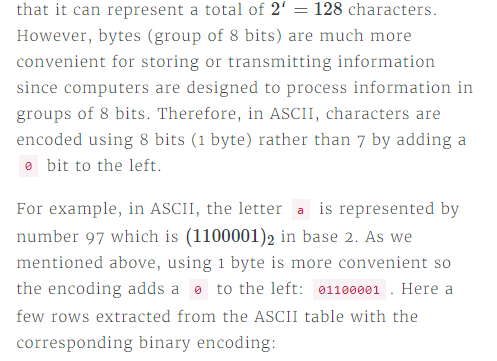

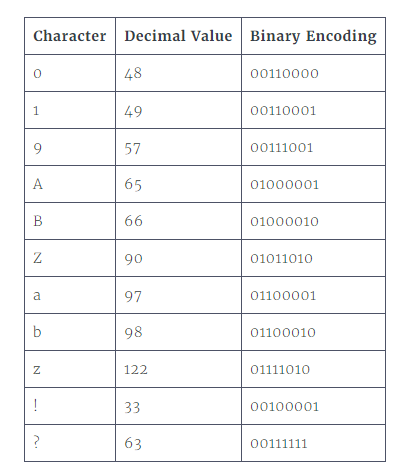

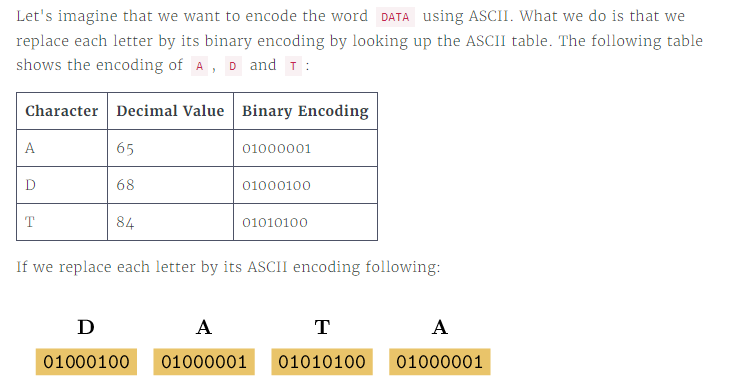

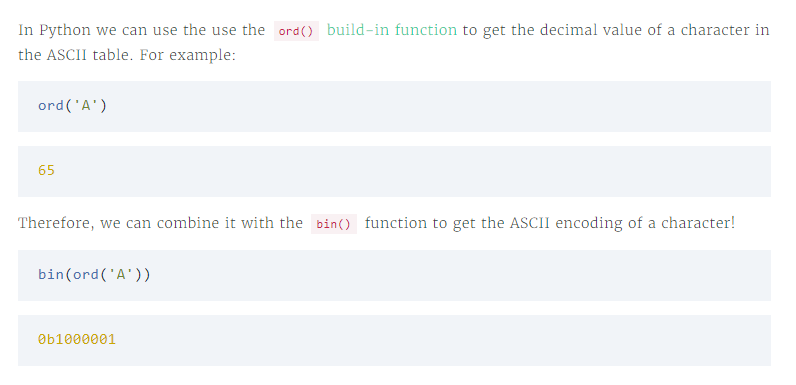

**Task**

A string named `data` is provided

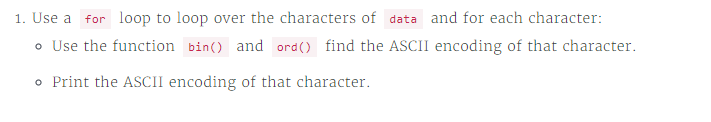

**Answer**

In [1]:
data = "QUEST"
for c in data:
    ascii_c = bin(ord(c))
    print(ascii_c)

0b1010001
0b1010101
0b1000101
0b1010011
0b1010100


Above we learned that the ASCII encoding is simply a table that specifies 128 characters and how to encode each of them in binary. If we want to encode text written in English these 128 characters are probably enough.

But what if our text contains French characters like `é` or Chinese characters such as `你`? In the early days of computer science, people fixed this problem by creating new encodings that were able to encode what they wanted. At first people started to use the 8th bit of the ASCII encoding (that so far was always set to 0) to represent a total of 256 characters. But this was far from a solution since most languages need way more than 256 characters!

This led to the creation of a [wide variety of encodings](https://en.wikipedia.org/wiki/Character_encoding#Common_character_encodings). But solving the problem in this way created another problem. Regardless of the encoding that is used, the result is a sequence of 0's and 1's and so without knowing which encoding was used, it is not possible to properly decode the text! We have probably experienced this ourself, especially if we have shared text files between different operating systems.

For example, it can happen that we write a French sentence in one operating system and then when we open it on another operating system some characters will be displayed as `�`:

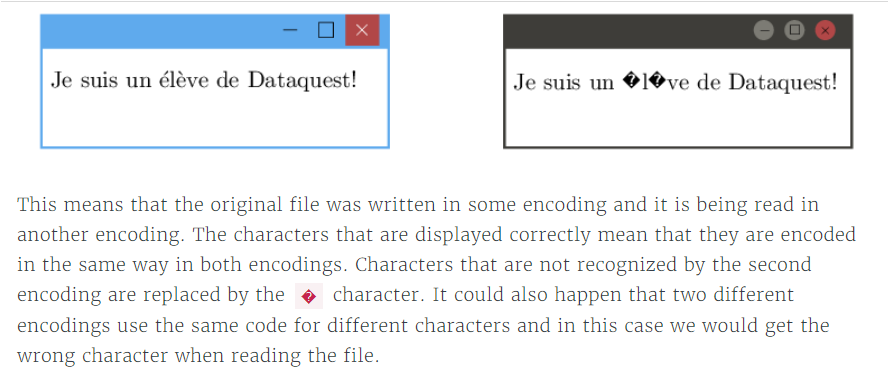

In Python we can encode a string using the [`str.encode()` method](https://docs.python.org/3.7/library/stdtypes.html?highlight=str#str.encode). This method takes two (optional) parameters:

1. The name of the encoding into which we want to encode the string.
2. The way we want errors to be handled. By default the function will throw an error if we try to encode a character that cannot be represented with that encoding.

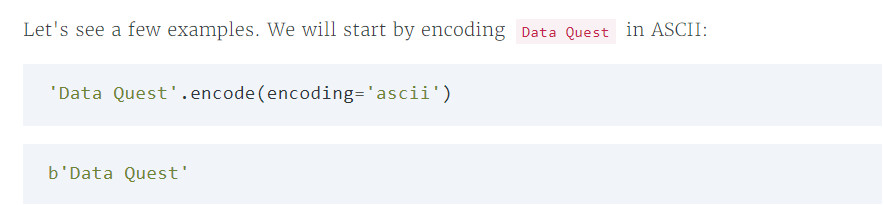

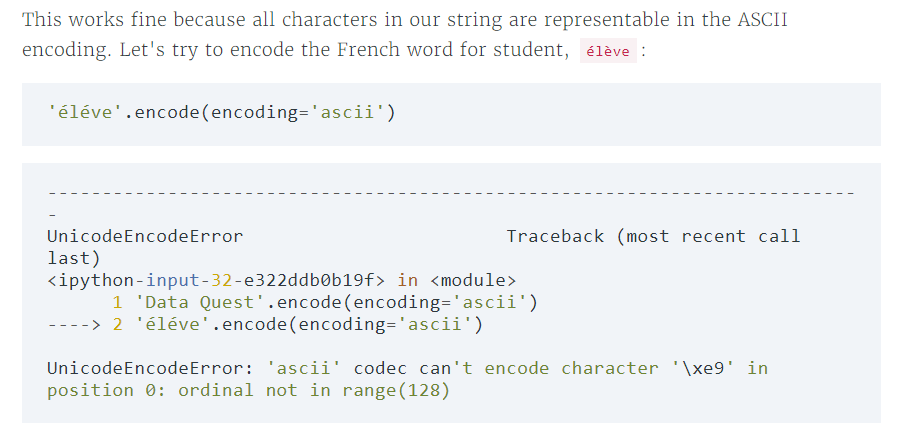

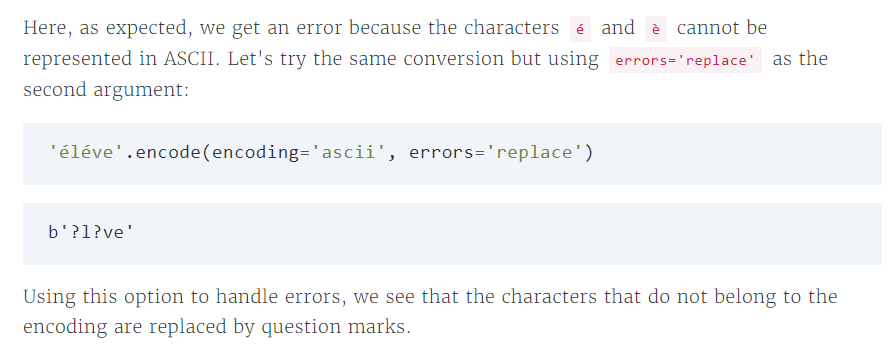

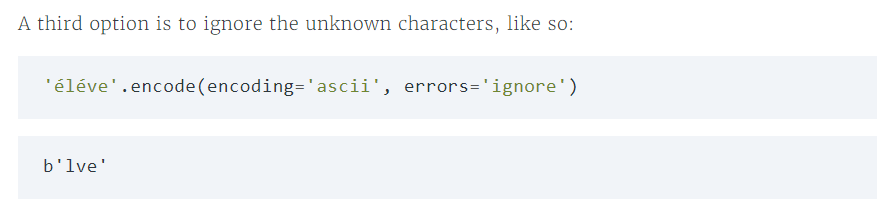

We might have expected the output of `str.encode()` to be a sequence of 0's and 1's. Instead, we got something that looks like a string but is prefixed by a `b`. We will learn what this all means.

**Task**

A string named `text` is provided

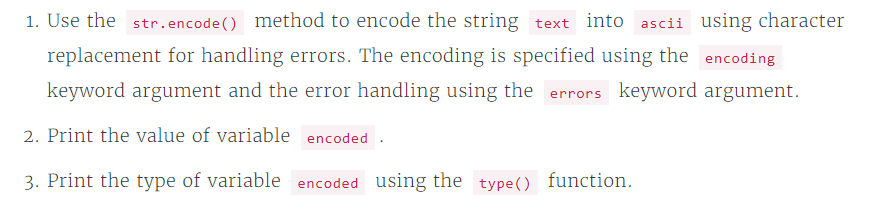

**Answer**

In [2]:
text = "The Swedish word for quest is sökande"
encoded = text.encode(encoding='ascii', errors='replace')
print(encoded)
print(type(encoded))

b'The Swedish word for quest is s?kande'
<class 'bytes'>


Above we saw that when we encode a string and print the result it comes prefixed with a `b`. In the exercise we printed the type of the encoding and saw that it is a [`bytes` object](https://docs.python.org/3/library/stdtypes.html#bytes).

Remember that we learned that **1 byte** is equal to **8 bits**. So when we encoded strings above we indeed got a sequences of 0's and 1's as output. It just did not look like it because Python uses a `bytes` object to represent them.

Internally, a `bytes` object is represented as a sequence of integers between 0 and 255. If we are wondering where these values come from, remember that 1 byte is 8 bits and that 8 bits can represent $2^8=256$ values. In other words, 1 byte can be represented by any integer between 0 and 255.

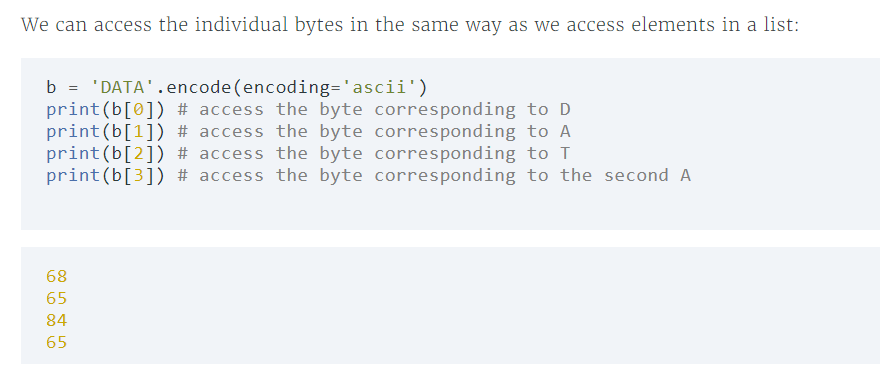

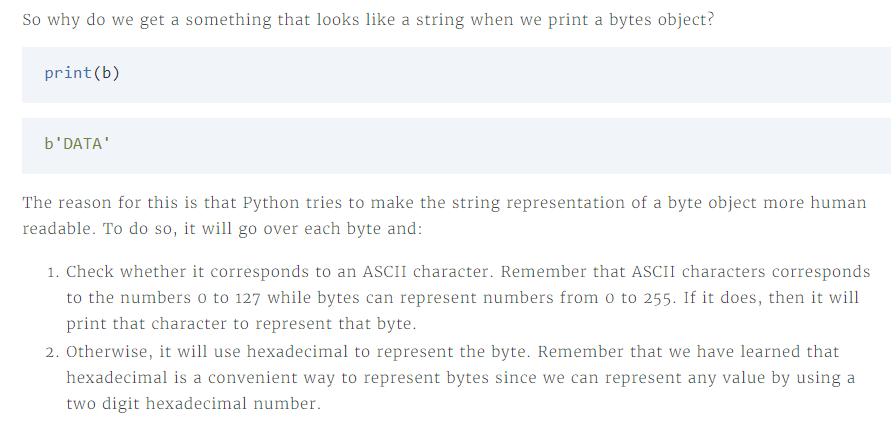

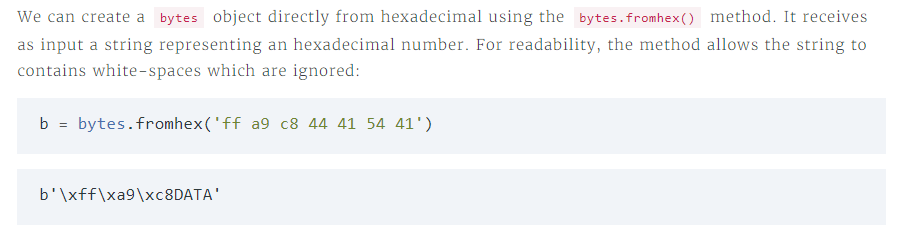

Let's break down the above output. First we see some `\x`. These are simply used to specify that what follows is a pair of **hexadecimal** digits representing one byte. So let's add spaces to help us parse it:

`\xff \xa9 \xc8 D A T A`

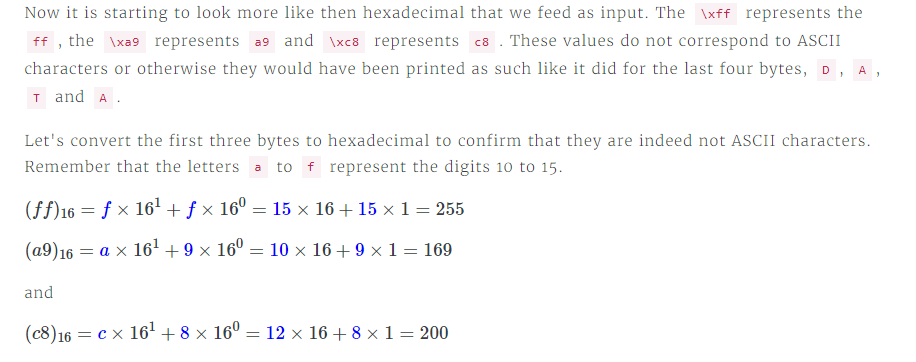

As we can see, all these values are larger than 127, so they do not correspond to ASCII characters.

If we are having trouble to see why `44` in hexadecimal represents the ASCII character `D` (the reasoning for the others is the same). If we convert $(44)_1$$_6$ to base 10 we get:

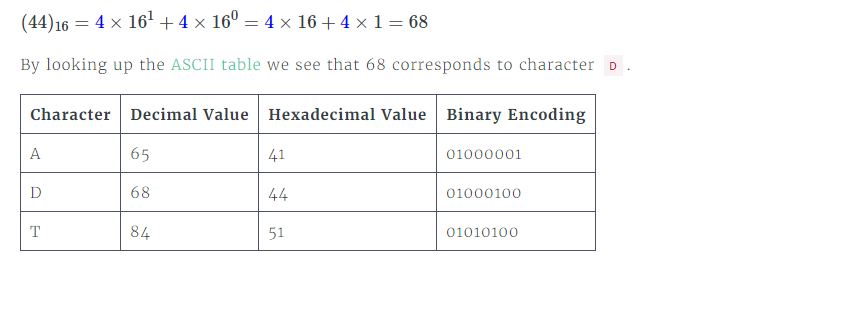

**Task**

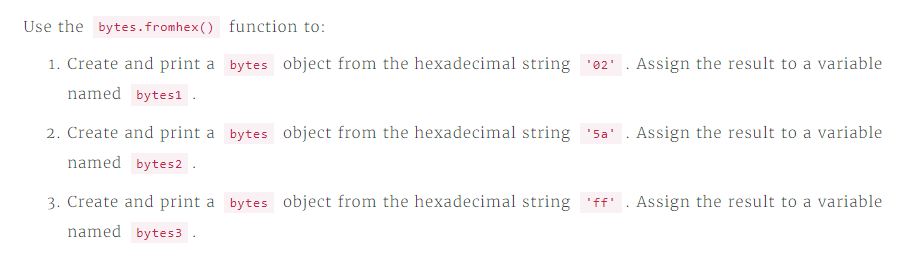

**Answer**

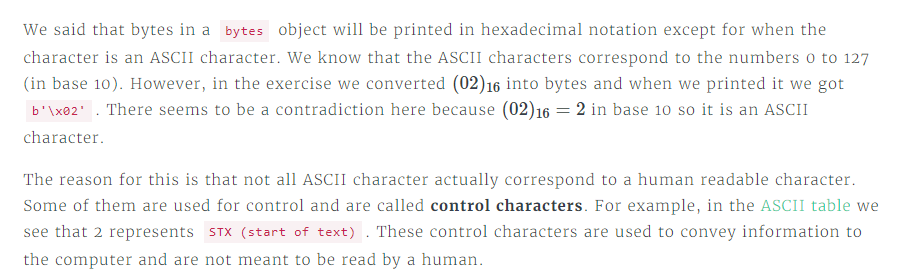

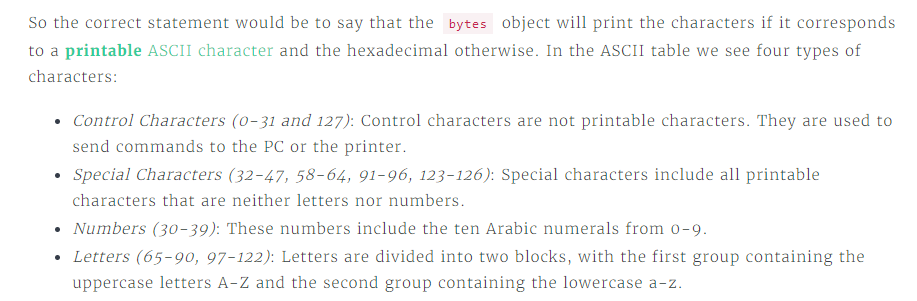

We do not need to memorize these numbers but sometimes it can be useful to know them. For example, if we wanted to program a function that checks if a single character is lower case we do it by:

1. Converting the character to an integer using the `ord()` function 
2. Checking whether this value is between 97 and 122:

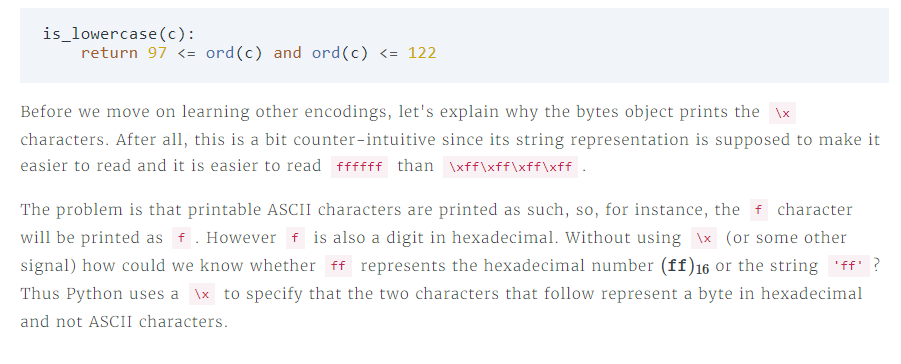

**Task**

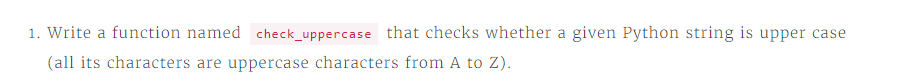

**Answer**

In [3]:
string_1 = 'lowercase'
string_2 = 'UPPERCASE'
def check_uppercase (pstring):
    for letter in pstring:
        if not (ord(letter) >= 65 and ord(letter)<=90):
            return False
    return True

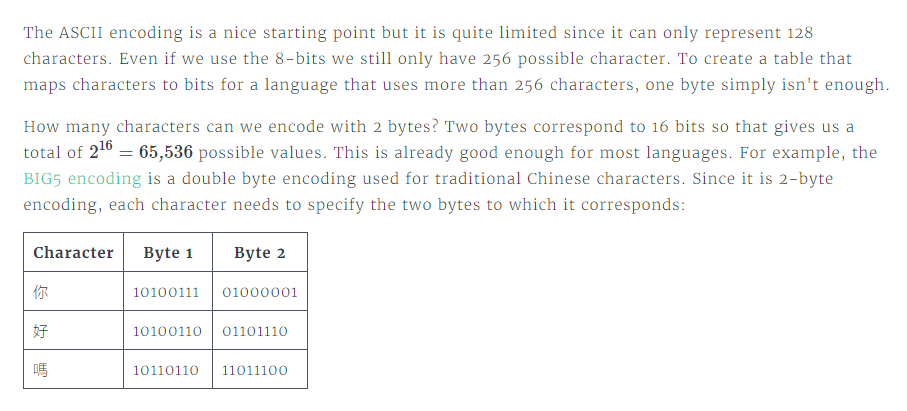

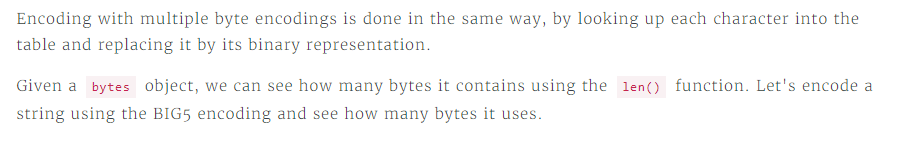

**Task**

A string named `trad_chinese` is provided

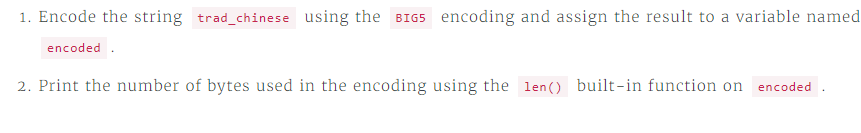

**Answer**

In [4]:
trad_chinese = "你好嗎?"
encoded = trad_chinese.encode(encoding="BIG5")
print(len(encoded))

7


Above we encoded a string the 4 character string `你好嗎`? in `BIG5`. However when we printed the number of bytes used we obtained `7`. What, shouldn't it be `8`? This goes against the fact that we said that `BIG5` used `2 bytes` to encode each character. Let's print the bytes to better see what is going on:

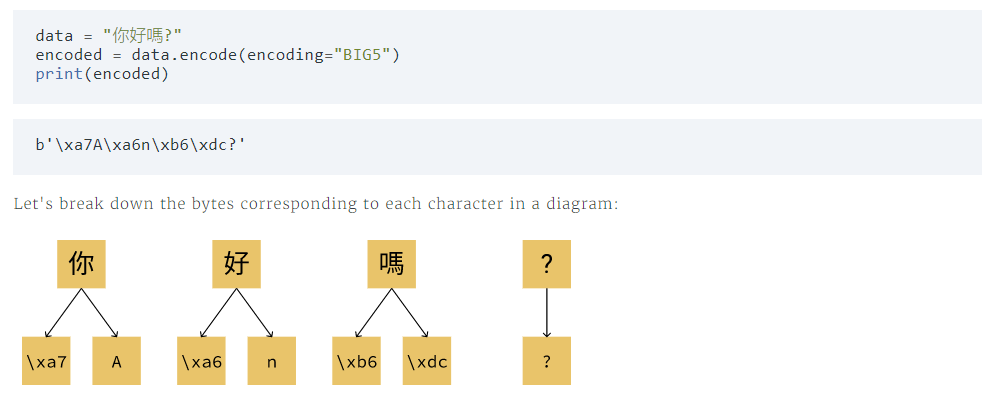

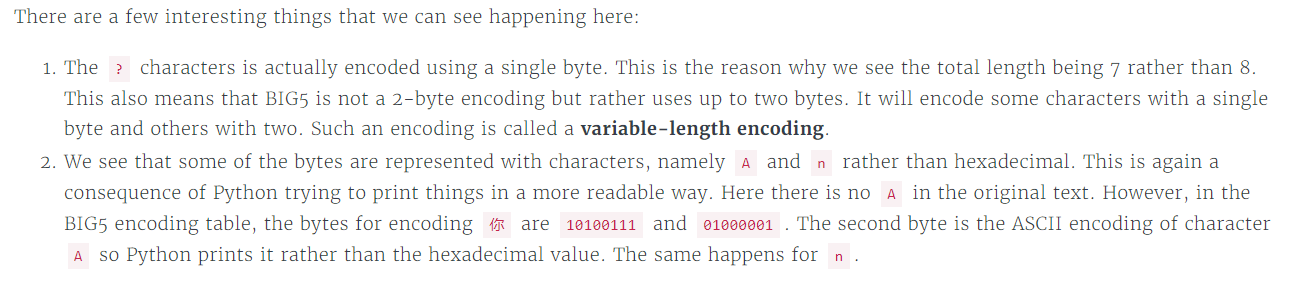

All of these encodings make it possible to display text in a lot of languages, but it comes at the cost of having to know the encoding used on the text in order to be able to read it.

In an effort to overcome this, people invented **[Unicode](https://en.wikipedia.org/wiki/Unicode)**. Unicode is not actually an encoding. It is a very big table with `1,114,112` entries that maps symbols to codes. We are calling it symbols because the table is so big that it has space for things other than characters. For example, it contains entries for emojis.

For example, [here](http://www.unicode.org/charts/) we can find the charts composing the Unicode table. Each chart is simply a group of symbols that is part of the table. Each such chart is a table that maps symbols to their code. Here is a screenshot containing the first few rows of the [ASCII chart](https://www.unicode.org/charts/PDF/U0000.pdf) of Unicode:

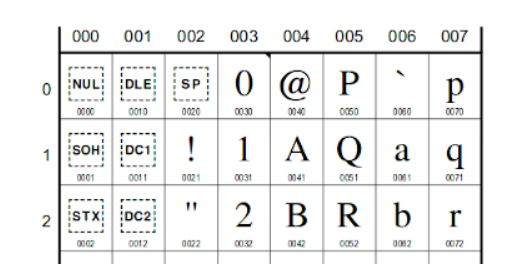

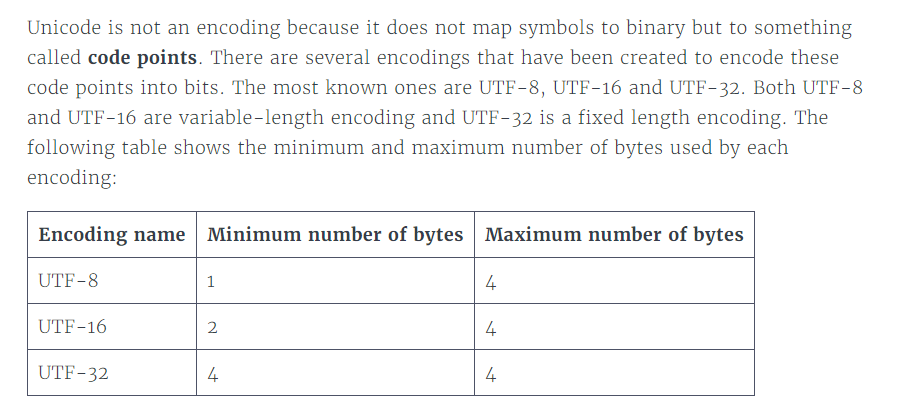

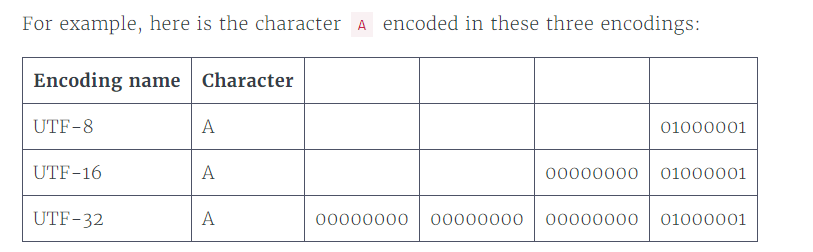

All three encodings are capable of encoding all symbols defined in Unicode. We might be wondering, why we have three such encodings?

The disadvantage of UTF-32 is that it wastes a lot of space since most characters can be represented with less than four bytes. It has the advantage of being very easy to decode because every character uses the same number of bytes. Because of its wasteful usage of space, UTF-32 is rarely used. You might think that, because UTF-8 uses a minimum of 8 bits, files encoded in UTF-8 occupy less space than the same files encoded in UTF-16. However that really depends on what language the text is in. For non-European languages, UTF-8 actually requires more memory than UTF-16.

UTF-8 is one of the most commonly used encodings, and Python often defaults to using it. For instance it is the default argument of the `bytes.encode()` method.

**Task**

A string named `sentence` 

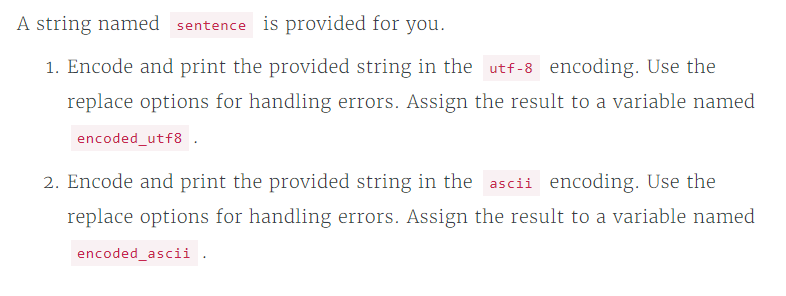

**Answer**

In [5]:
sentence = "ASCII cannot represent these: 你好嗎"
encoded_utf8 = sentence.encode(encoding='utf-8', errors='replace')
encoded_ascii = sentence.encode(encoding='ascii', errors='replace')

So far we have only been encoding strings. But how can we do the reverse operation and decode a bytes object into the original string?

To do this, we can use the [`bytes.decode()` method](https://docs.python.org/3/library/stdtypes.html#bytes.decode). The arguments of this method are the same as the `str.encode()` method. Let's see some examples:

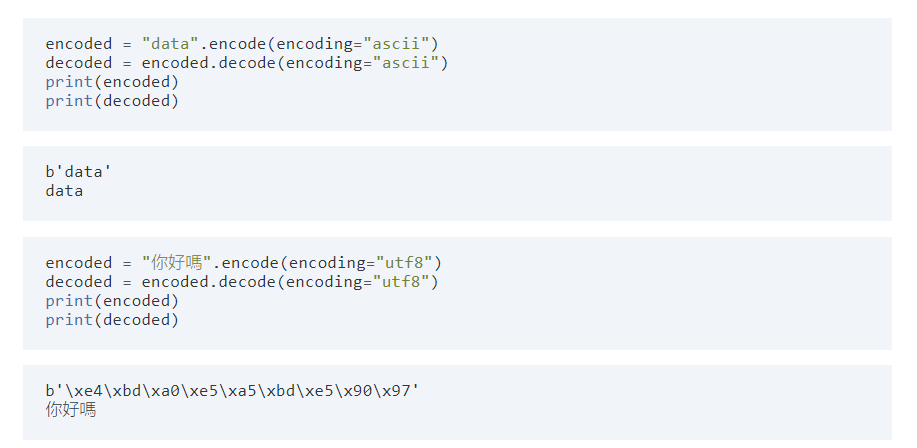

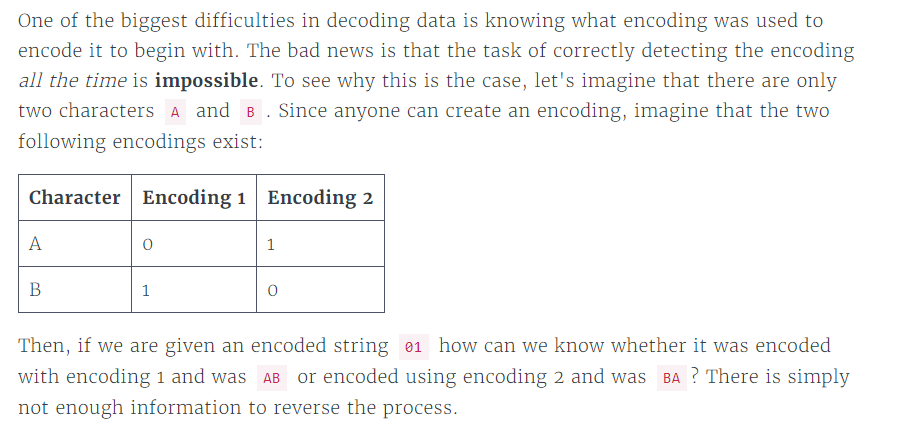

The good news is that, in general, we can use heuristics to try to figure it out. For example, if we are expecting English text and when we decode it we get `䔀渀最氀椀猀栀 琀攀砀琀` or if we are expecting French text and we decode it and get `vous Ãªtes un Ã©lÃ¨ve?`, We know that we are not using the right encoding!

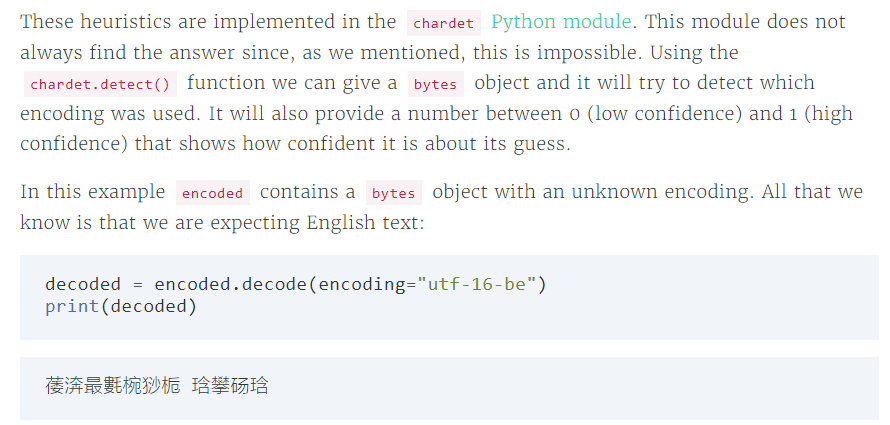

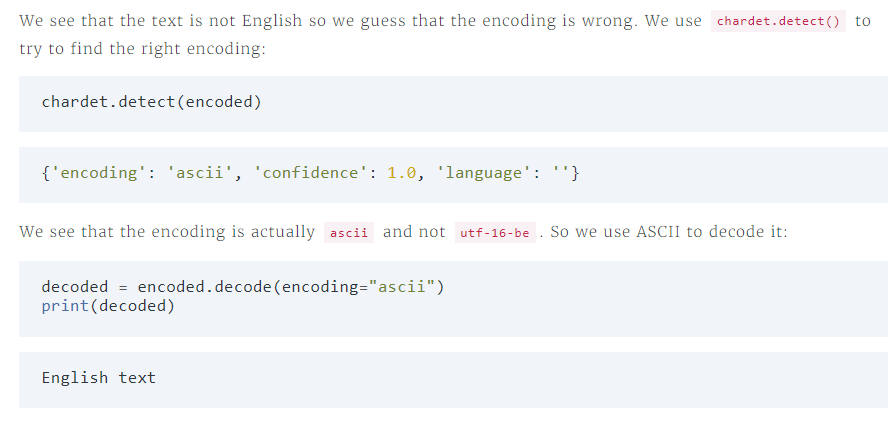

**Task**

A bytes object named `encoded` is provided

1. Decode the `encoded` bytes object using the `cp1252` encoding. Assign the result to a variable named `decoded_cp1252`.
2. Import the `chardet` module.
3. Use the function `chardet.detect()` to try to detect the correct encoding. Assign the detected encoding to a variable named `encoding`. We can access the encoding by accessing the `'encoding'` key of dictionary resulting from calling the `chardet.detect()` method.
4. Using the encoding found in step 3 to decode the `encoded` bytes object. Assign the result to a variable named `decoded`.

**Answer**

In [6]:
decoded_cp1252 = encoded.decode(encoding="cp1252")
print(decoded_cp1252)

import chardet
encoding = chardet.detect(encoded)['encoding']

decoded = encoded.decode(encoding=encoding)
print(decoded)

§A¦n¶Ü?
§A¦n¶Ü?


In this file we learned how a computer represents text internally. A lot of different encodings exist and each one of them is able to represent a specific set of characters.

To overcome this Unicode was created. Unicode is not an encoding but rather a table that gathers together all known symbols and gives each of them a code. It has enough space to represent any known characters and symbol. The `UTF-8` encoding is able to encode all Unicode symbols using up to `4 bytes`.

Knowing how to deal with encodings is an important skill because as a data engineer we will have to deal with data coming from a wide range of sources. Without knowing about encodings we would probably not be able to process and store that data in a human readable way.